In [186]:
import sys
import numpy as np
import cv2
# 이미지 읽어 들이기 --- (※ 1)
# im = cv2.imread('ttt2.PNG')
im = cv2.imread('digit.jpg')

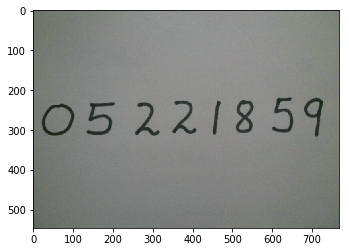

In [187]:
# Will use matplotlib for showing the image
from matplotlib import pyplot as plt
%matplotlib inline

# Plot
# cv2.imshow('image',im) 대용
plt.imshow(im) 

In [188]:
# 그레이스케일로 변환하고 블러를 걸고 이진화하기 --- (※2)
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
#thresh = cv2.adaptiveThreshold(gray, 255, 1, 1, 11, 2)

In [189]:
# 윤곽 추출하기 --- (※3)
contours = cv2.findContours(
  thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]

In [190]:
len(contours)

3262

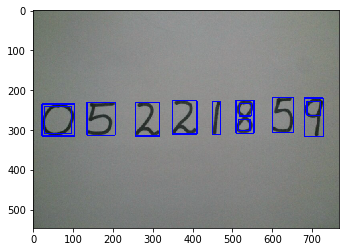

In [191]:
# 추출한 윤곽을 반복 처리하기 --- (※4)
for cnt in contours:
  x, y, w, h = cv2.boundingRect(cnt) # --- (※5)
  if h < 20: continue # 너무 작으면 건너뛰기
  red = (0, 0, 255)
  cv2.rectangle(im, (x, y), (x+w, y+h), red, 2)

# cv2.imwrite('numbers-cnt.PNG', im)
plt.imshow(im) 

In [192]:
len(contours)

3262

http://hanzratech.in/2015/02/24/handwritten-digit-recognition-using-opencv-sklearn-and-python.html 참고하여 다른 방식으로 전처리해보자

In [ ]:
im = cv2.imread('ttt.png')
# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)
# Threshold the image
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

plt.imshow(im_th) 

In [204]:
# Find contours in the image
contours = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
len(contours)

83

https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html 참고하여 다시...

https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html

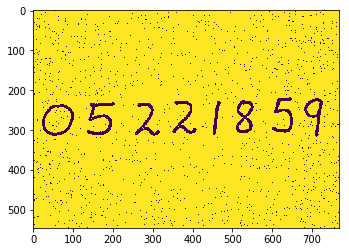

In [247]:
#im = cv2.imread('ttt.png')
im = cv2.imread('digit.jpg')

gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
# cv.medianBlur(img,5)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(thresh) 

In [248]:
contours = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]
len(contours)

3463

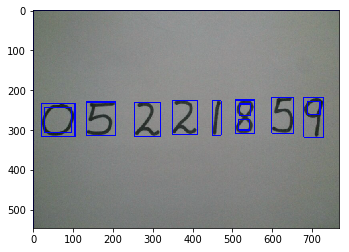

In [250]:
im2 = im.copy()
for cnt in contours:
  x, y, w, h = cv2.boundingRect(cnt) # --- (※5)
  if h < 20: continue # 너무 작으면 건너뛰기
  red = (0, 0, 255)
  cv2.rectangle(im2, (x, y), (x+w, y+h), red, 2)

plt.imshow(im2) 

In [220]:
contours[4]

array([[[  0,   0]],

       [[  0, 142]],

       [[337, 142]],

       [[337,   0]]], dtype=int32)

In [252]:
# [cv2.contourArea(c,True) for c in contours]

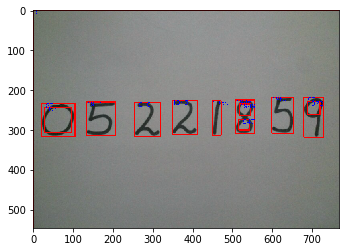

In [254]:
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]
#print(len(contours))
im2 = im.copy()
for i,cnt in enumerate(contours,0):
    x, y, w, h = cv2.boundingRect(cnt) # --- (※5)
    if h < 20: continue # 너무 작으면 건너뛰기
    red = (255, 0, 0)
    cv2.rectangle(im2, (x, y), (x+w, y+h), red, 2)
    cv2.putText(im2, str(i), (x, y+10), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255))
    

plt.imshow(im2) 

In [ ]:
# 윤곽 추출하기 --- (※3)
contours = cv2.findContours(
    thresh,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)[1]

In [ ]:
# 추출한 윤곽을 반복 처리하기 --- (※4)
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt) # --- (※5)
    if h < 20: continue # 너무 작으면 건너뛰기
    red = (0, 0, 255)
    cv2.rectangle(im, (x, y), (x+w, y+h), red, 2)

#cv2.imwrite('numbers-cnt.PNG', im)
plt.imshow(im) 

In [7]:
import ocr_mnist
# MNIST 학습 데이터 읽어 들이기 --- (※1)
mnist = ocr_mnist.build_model()
mnist.load_weights('mnist.hdf5')

Using TensorFlow backend.


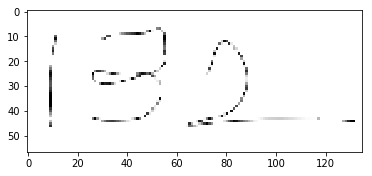

In [144]:
# 이미지 읽어 들이기 --- (※2)
im = cv2.imread('ttt2.PNG')
#im = cv2.imread('numbers100.PNG')

plt.imshow(im) 

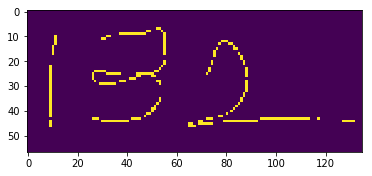

In [145]:
# 윤곽 추출하기 --- (※3)
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) # 그레이스케일로 변환하기
blur = cv2.GaussianBlur(gray, (5, 5), 0) # 블러

#thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2) # 2진화
thresh = cv2.adaptiveThreshold(gray, 255, 1, 1, 11, 2) # 2진화

# cv2.imwrite("numbers100-th.PNG", thresh)
plt.imshow(thresh) 

In [146]:
contours = cv2.findContours(thresh,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[1]
len(contours)

31

In [147]:
# 추출한 좌표 정렬하기 --- (※4)
rects = []
im_w = im.shape[1]
for i, cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
    # if w < 10 or h < 10: continue # 너무 작으면 생략하기
    # if w > im_w / 5: continue # 너무 크면 생략하기
    y2 = round(y / 10) * 10 # Y좌표 맞추기
    index = y2 * im_w  + x
    rects.append((index, x, y, w, h))
rects = sorted(rects, key=lambda x:x[0]) # 정렬하기

In [148]:
print(rects)

[(1360, 10, 10, 2, 8), (1380, 30, 10, 4, 2), (1387, 37, 8, 13, 2), (1402, 52, 7, 4, 11), (1427, 77, 12, 8, 4), (2709, 9, 22, 1, 21), (2726, 26, 24, 12, 5), (2741, 41, 20, 15, 8), (2772, 72, 23, 2, 3), (2774, 74, 20, 1, 2), (2775, 75, 15, 2, 4), (2785, 85, 17, 3, 5), (2788, 88, 23, 1, 4), (4079, 29, 29, 7, 1), (4087, 37, 28, 3, 1), (4102, 52, 28, 2, 2), (4132, 82, 28, 7, 13), (5409, 9, 44, 1, 3), (5426, 26, 43, 3, 1), (5430, 30, 44, 11, 1), (5442, 42, 43, 4, 1), (5447, 47, 35, 7, 8), (5465, 65, 45, 3, 2), (5469, 69, 44, 6, 2), (5472, 72, 43, 3, 1), (5477, 77, 42, 2, 1), (5479, 79, 44, 14, 1), (5480, 80, 41, 1, 1), (5494, 94, 43, 20, 1), (5517, 117, 43, 1, 1), (5527, 127, 44, 5, 1)]


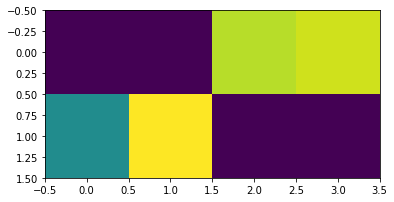

In [149]:
index, x, y, w, h = rects[1]
num = gray[y:y+h, x:x+w] # 부분 이미지 추출하기
num = 255 - num # 반전하기
plt.imshow(num) 

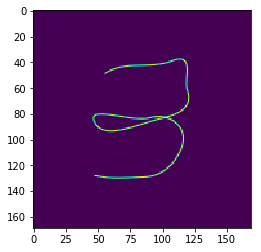

In [137]:
# 여백을 주기위해 긴 길이 기준으로 1.8배짜리 박스 생성 
ww = round((w if w > h else h) * 1.8)
spc = np.zeros((ww, ww))

# 실제 그리기 시작해야하는 점 -> 여백
wy = (ww-h)//2
wx = (ww-w)//2
# print(w,h,ww,wy,wx)

spc[wy:wy+h, wx:wx+w] = num
plt.imshow(spc) 

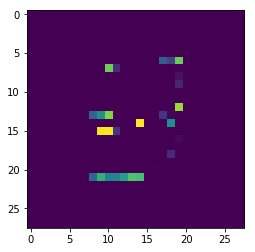

In [138]:
num1 = cv2.resize(spc, (28, 28)) # MNIST 크기 맞추기
plt.imshow(num1) 

In [76]:
num = num.reshape(28*28)
num = num.astype("float32") / 255

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [64]:
# 해당 영역의 이미지 데이터 추출하기 --- (※5)
X = []
for i, r in enumerate(rects):
    index, x, y, w, h = r
    num = gray[y:y+h, x:x+w] # 부분 이미지 추출하기
    num = 255 - num # 반전하기
    # 정사각형 내부에 그림 옮기기
    ww = round((w if w > h else h) * 1.85) 
    spc = np.zeros((ww, ww))
    wy = (ww-h)//2
    wx = (ww-w)//2
    spc[wy:wy+h, wx:wx+w] = num
    num = cv2.resize(spc, (28, 28)) # MNIST 크기 맞추기
    # cv2.imwrite(str(i)+"-num.PNG", num) # 자른 문자 저장하기
    # 데이터 정규화
    num = num.reshape(28*28)
    num = num.astype("float32") / 255
    X.append(num)

In [53]:
# 예측하기 --- (※6)
nlist = mnist.predict(np.array(X))

print([n.argmax() for n in nlist])

[2, 2, 8]


In [25]:
# 결과확인
''' 
s = "31415926535897932384" + \
    "62643383279502884197" + \
    "16939937510582097494" + \
    "45923078164062862089" + \
    "98628034825342117067"
answer = list(s) 
ok = 0

for i, n in enumerate(nlist):
    ans = n.argmax()
    if ans == int(answer[i]):
        ok += 1
    else:
        print("[ng]", i, "번째", ans, "!=", answer[i], np.int32(n*100))
print("정답률:", ok / len(nlist))
'''

' \ns = "31415926535897932384" +     "62643383279502884197" +     "16939937510582097494" +     "45923078164062862089" +     "98628034825342117067"\nanswer = list(s) \nok = 0\n\nfor i, n in enumerate(nlist):\n    ans = n.argmax()\n    if ans == int(answer[i]):\n        ok += 1\n    else:\n        print("[ng]", i, "번째", ans, "!=", answer[i], np.int32(n*100))\nprint("정답률:", ok / len(nlist))\n'

[3,
 1,
 4,
 1,
 5,
 9,
 2,
 6,
 5,
 3,
 5,
 8,
 9,
 7,
 9,
 3,
 2,
 3,
 8,
 4,
 6,
 2,
 6,
 4,
 3,
 3,
 8,
 3,
 2,
 7,
 9,
 5,
 0,
 2,
 8,
 8,
 4,
 1,
 9,
 7,
 1,
 6,
 9,
 3,
 9,
 9,
 3,
 7,
 5,
 1,
 0,
 5,
 8,
 2,
 0,
 9,
 7,
 4,
 9,
 4,
 4,
 5,
 9,
 2,
 3,
 0,
 7,
 8,
 1,
 6,
 4,
 0,
 6,
 2,
 8,
 6,
 2,
 0,
 8,
 9,
 9,
 8,
 6,
 2,
 8,
 0,
 3,
 4,
 8,
 2,
 5,
 3,
 4,
 2,
 1,
 1,
 7,
 0,
 6,
 7]